In [1]:
# Run the following in Colab to get the data.

# Set up environment
!pip install scanpy
!python -m pip uninstall -y matplotlib
!pip install matplotlib==3.1.3
import scanpy as sc
import pandas as pd

# PIP-seq barcoding data
!rm -r ./*
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE215nnn/GSE215165/suppl/GSE215165_TS20220816_FR_6.zip
!unzip GSE215165_TS20220816_FR_6.zip
pip_barcoded     = sc.read_mtx("filtered_matrix_with_adt/matrix.mtx").T
pip_barcoded.obs = pd.read_csv("filtered_matrix_with_adt/barcodes.tsv", header = None, sep = "\t")
pip_barcoded.var = pd.read_csv("filtered_matrix_with_adt/genes.tsv",    header = None, sep = "\t")
pip_barcoded

# The sample barcodes (hashtags) are extra non-gene features starting with "HTO". 
pip_barcoded.var.tail()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=154d7b7ea9998097335b700fa9df3ebfbd113527e3fb275bad826397943678dc
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8042 sha256=570298d7b3fe047c37

,0,1
37465,ENSG00000276017,ENSG00000276017
37466,ENSG00000278817,ENSG00000278817
37467,ENSG00000277196,ENSG00000277196
37468,HTO_3-TTCCGCCTCTCTTTG,HTO_3
37469,HTO_5-AAGTATCGTTTCGCA,HTO_5


Component 2: barcoding accuracy. Download the multiplexed PIP-seq data from GEO record GSE215165 or use the starter code below. Determine how easy or hard it is to separate the two barcoded samples. What percentage of cells do you think are mis-classified or cannot be classified?


In [2]:
pip_barcoded.var

,0,1
0,ENSG00000243485,MIR1302-2HG
1,ENSG00000237613,FAM138A
2,ENSG00000186092,OR4F5
3,ENSG00000238009,ENSG00000238009
4,ENSG00000239945,ENSG00000239945
...,...,...
37465,ENSG00000276017,ENSG00000276017
37466,ENSG00000278817,ENSG00000278817
37467,ENSG00000277196,ENSG00000277196
37468,HTO_3-TTCCGCCTCTCTTTG,HTO_3


In [3]:
print(len(pip_barcoded.obs[0].unique()))

2979


In [4]:
print(len(pip_barcoded.obs[0]))

2979


In [5]:
pip_barcoded.obs

,0
0,AAAAAAGTATCCAAAA
1,AAAAAATACAATAGCC
2,AAAAACACAACCAGCC
3,AAAAACACAGATCCAA
4,AAAAACCCATCTCCTA
...,...
2974,CCTTCATGCCTTATTT
2975,CCTTCCCAAGTCATAT
2976,CCTTCCCCAGAAAAAT
2977,CCTTCCGGAAACCACG


In [6]:
#Visualizing and getting the X component of the pip_barcoded anndata
pip_barcoded.to_df(layer=None)

,0,1,2,3,4,5,6,7,8,9,...,37460,37461,37462,37463,37464,37465,37466,37467,37468,37469
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,334.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296.0,48.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408.0,34.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,72.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1854.0,286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671.0,37.0
2975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399.0,36.0
2976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,903.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,445.0,1615.0


In [7]:
#Extracting the last two columns with the hashtag barcode values for each cell
barcode_frame = pip_barcoded.to_df(layer=None).iloc[:, 37468:37470]

In [8]:
import matplotlib.pyplot as plt

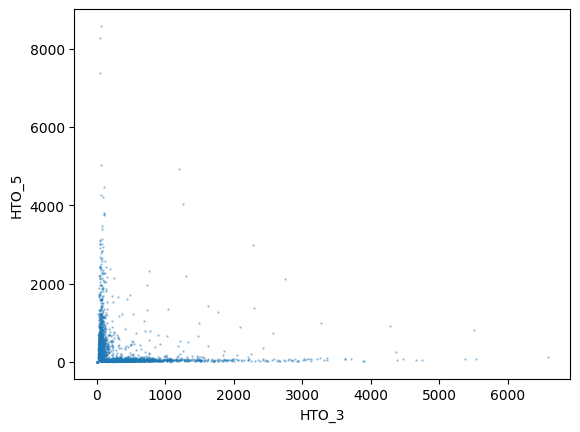

In [9]:
x1 = [0, 9000]
y1 = [400, 400]
y2 = [0, 9000]

#plotting both the hastag barcode values for HTO_3 and HTO_5, but also plotting threshold values of x=400 and y=400
plt.plot(barcode_frame.iloc[:,0], barcode_frame.iloc[:,1], alpha = 0.4, linestyle = '', marker = 'h', markersize=0.7)
plt.xlabel("HTO_3")
plt.ylabel("HTO_5")
plt.show()

In [23]:
#Manual Annotation of sample type based on threshold values
pred_list = []
for i in range(0, len(barcode_frame)):
  #HTO_3
  if (barcode_frame.iloc[i, 0] > barcode_frame.iloc[i,1]) and (barcode_frame.iloc[i,1]/(barcode_frame.iloc[i, 0] + barcode_frame.iloc[i,1]) < 0.2):
    pred_list.append("HTO_3")
  #HTO_5
  elif (barcode_frame.iloc[i, 1] > barcode_frame.iloc[i,0]) and (barcode_frame.iloc[i,0]/(barcode_frame.iloc[i, 0] + barcode_frame.iloc[i,1]) < 0.2):
    pred_list.append("HTO_5")
  #Doublet
  else:
    pred_list.append("Doublet")

In order to separate the two samples--the samples that were hashtag barcoded as HTO_3 or HTO_5, there needed to be some threshold values to determine a cell as belonging to the HTO_3 sample or the HTO_5 sample as cell samples often contained both HTO_3 and HTO_5. The threshold was such that if the HTO samples that was the lesser of the two HTO's was greater than 20% of the total HTO value, then that cell was considered to be a doublet. Otherwise, it was considered to be HTO 3 or HTO 5 depending on which HTO sample value was greater. This threshold rule was the same as the threshold rule used to separate doublets in the species mixture data in component 1.

In [12]:
barcode_frame["Sample2"] = pred_list

In [13]:
barcode_frame

,37468,37469,Sample2
0,89.0,334.0,Doublet
1,296.0,48.0,HTO_3
2,408.0,34.0,HTO_3
3,82.0,72.0,Doublet
4,1854.0,286.0,HTO_3
...,...,...,...
2974,671.0,37.0,HTO_3
2975,399.0,36.0,HTO_3
2976,61.0,903.0,HTO_5
2977,445.0,1615.0,Doublet


In [24]:
#Mapping the sample types to numbers in order to label according to color in scatter plot
name_to_number = {'Doublet': 0, 'HTO_3': 1, 'HTO_5': 2}
numbers = [name_to_number.get(item) for item in pred_list]
print(numbers)

[0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 

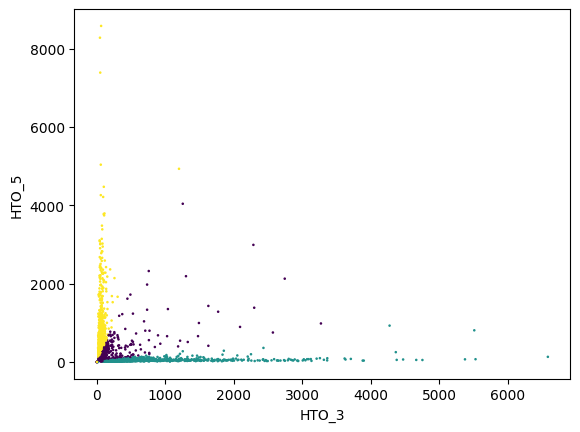

In [25]:
x1 = [0, 9000]
y1 = [400, 400]
y2 = [0, 9000]

plt.scatter(barcode_frame.iloc[:,0], barcode_frame.iloc[:,1], c = numbers, s = 0.7)
plt.xlabel("HTO_3")
plt.ylabel("HTO_5")
plt.show()

In [16]:
#Counting cells according to sample type
Doublet_count2 = 0
HTO3_count2 = 0
HTO5_count2 = 0

for item in barcode_frame.iloc[:,2]:
  if item == "Doublet":
    Doublet_count2 += 1
  elif item == "HTO_3":
    HTO3_count2 += 1
  elif item == "HTO_5":
    HTO5_count2 += 1

In [26]:
#Accuracy of sample separation
(HTO3_count2 + HTO5_count2)/(Doublet_count2 + HTO3_count2 + HTO5_count2)

0.8116817724068479

The accuracy in the HTO barcoding for this data set was found to be approximately 81% using the thresholding rules as stated above. This means that approximately 19% of cell samples were "doublets" that could more easily be mis-classified/cannot be classified. Looking at the labeled scatterplots using the threshold rules described earlier, cell samples that had overall low HTO_3 and low HTO_5 values were more difficult to assign as a sample belonging to HTO_3 or HTO_5.

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state = 0)
kmeans.fit(barcode_frame.iloc[:,0:2])
y_kmeans = kmeans.predict(barcode_frame.iloc[:,0:2])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'HTO_5')

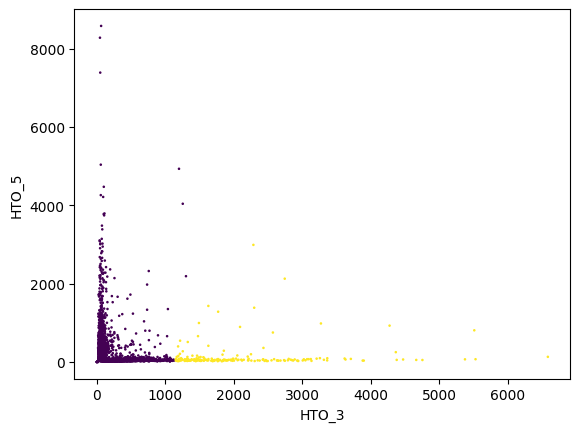

In [29]:
fig = plt.figure(figsize = (6.4,4.8))
ax = fig.add_subplot(1,1,1)
ax.scatter(barcode_frame.iloc[:,0], barcode_frame.iloc[:,1], c=y_kmeans, s = 0.7)
plt.xlabel("HTO_3")
plt.ylabel("HTO_5")

In [20]:
from sklearn.metrics import silhouette_score

In [27]:
#Calculating Silhouette score
score = silhouette_score(barcode_frame.iloc[:,0:2], kmeans.labels_, metric = 'euclidean')

In [28]:
score

0.67738485

In addition to the threshold rules used to determine the barcoding accuracy of PIP-seq, kmeans clustering and the silhouette score was conducted to assess the ease of separation between HTO_3 and HTO_5 samples as a supplement to the original analysis in this unsupervised clustering method. After running kmeans clustering with 2 clusters were processed and plotted, a Silhouette score was calculuated to assess how good the Kmeans clustering performed. With 2 clusters, the Kmeans clustering on the cell samples had a Silhouette score of 0.67738485. Silhouette score are used to measure how similar a data point in a cluster is to other data points in the same cluster. Silhouette scores are commonly caculated for unsupervised clustering scenarios as a performance metric. Silhouette scores range from -1 to 1, with 1 being the best score that corresponds to the best Kmeans clustering outcome. 0.67738485 represents a number relatively close to 1. Therefore, Kmeans clustering with 2 clusters was able find to relatively "good" clusters. Although Silhouette score is more a performance metric of Kmeans clustering, a Silhouette score close to 1 also suggests that the cell sample data was relatively easily separable into two samples.